# This project explores different image enhancement libraries in python for thermal images captured in CADIPT by the author

Author: Pantea Tavakolian, Ph.D.

CADIPT Lab: https://cadipt.mie.utoronto.ca/ 


We collected thermal images from different samples acquired and stored by Enhanced Truncated-correlation Photothermal Coherence Tomography. I applyed different morphological processing methods and explained how each one of them processes the images.

## 1. Tap-hat Transformation

This transformation is useful for enhancing detail in the presence of shading.There exist two types of top-hat transform.

### White top-hat 
The white top-hat transform is defined as the difference between the original image and its opening by some structuring element.
The white top-hat transform returns an image, containing those "objects" or "elements" of an input image that are "smaller" than the structuring element (i.e., places where the structuring element does not fit in), and
are brighter than their surroundings.


### Black top-hat
The black top-hat transform is defined dually as the difference between the closing and the original image.
The black top-hat returns an image, containing the "objects" or "elements" that are "smaller" than the structuring element, and darker than their surroundings.




--2020-03-04 03:32:42--  https://www.dropbox.com/s/fgvi31w2k7c0hgv/Rec-art2p-000022_PhaseAll.dat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fgvi31w2k7c0hgv/Rec-art2p-000022_PhaseAll.dat [following]
--2020-03-04 03:32:44--  https://www.dropbox.com/s/raw/fgvi31w2k7c0hgv/Rec-art2p-000022_PhaseAll.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccb643b7a8c44215b8654b513a6.dl.dropboxusercontent.com/cd/0/inline/AzN9fOLVd1y2Hxq-3FzYg1E6LAKoT4Dd2fGnvXVb25i9paJJRgZoU3sLuF9XIeynm173bswRTH0eO3HqkscjYE-YH6sB9uPVSLv9KurEYiRiw5oA9IwqtY0LN3qqmWr8TQc/file# [following]
--2020-03-04 03:32:44--  https://uccb643b7a8c44215b8654b513a6.dl.dropboxusercontent.com/cd/0/inline/AzN9fOLVd1y2Hxq-3FzYg1E6LAKoT4Dd2fGnvXVb25i9paJJRgZoU3sLuF

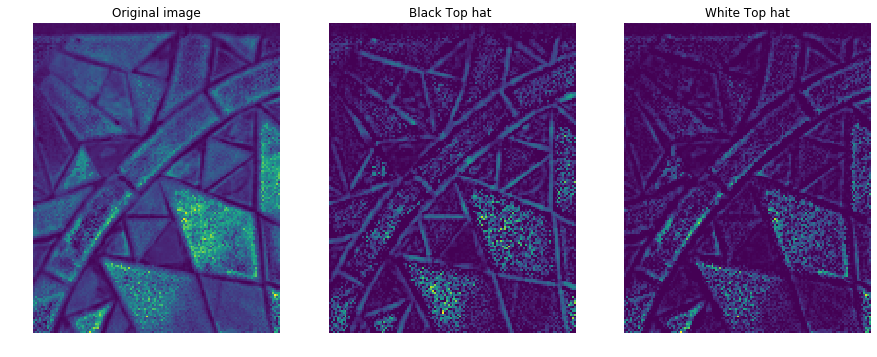

In [3]:
from skimage import io
import skimage.morphology as morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import square, black_tophat, white_tophat
from skimage.color import rgb2gray

!wget -O Rec-art2p-000022_PhaseAll.dat https://www.dropbox.com/s/fgvi31w2k7c0hgv/Rec-art2p-000022_PhaseAll.dat?dl=0

animage = np.loadtxt('Rec-art2p-000022_PhaseAll.dat' ,unpack=True)#usecols=(0,1))

n=10
image_grayscale=(animage[:, 128*n+1:128*(n+1)])

# convert the image to grayscale image: 
#image_grayscale= rgb2gray(animage)


#define the structuring element (selem):

selem = square (4)

#---------------Implement Top-Hat Filter-----------------
black_transformation = black_tophat(image_grayscale,selem)
white_transformation = white_tophat(image_grayscale,selem)
#----------------------------------------------------------

#Plot the figures
fig, axes = plt.subplots(ncols=3, figsize=(15, 7))
ax = axes.ravel()

ax[0].imshow(image_grayscale)#, cmap=plt.cm.gray)
ax[0].set_title('Original image')



ax[1].imshow(black_transformation)#, cmap=plt.cm.gray)
ax[1].set_title('Black Top hat ')

ax[2].imshow(white_transformation)#, cmap=plt.cm.gray)
ax[2].set_title('White Top hat')

for a in ax:
    a.axis('off')

plt.show()

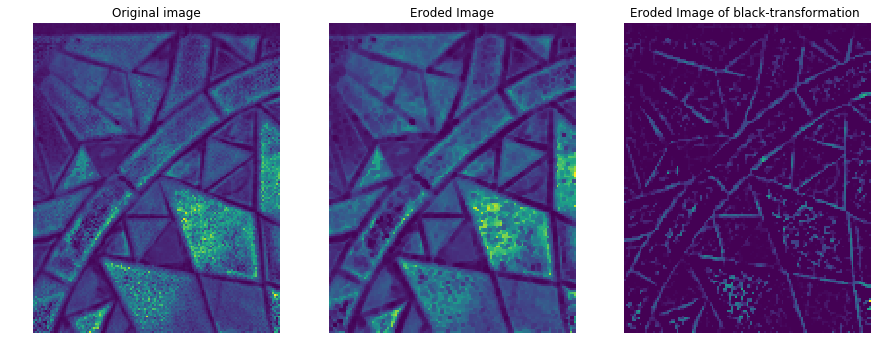

In [12]:
from skimage import io
import skimage.morphology as morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import erosion
from skimage.morphology import disk

# convert the image to grayscale image: 
#animage = io.imread('virus.jpg')
#grayscale= rgb2gray(animage)

# Now,choose the structuring element: 
selem1= square (2)
selem2 = disk (1) # Square selem works better

#---------------Implement Erosion Filter-----------------
eroded1= erosion(image_grayscale,selem1)
eroded2= erosion(black_transformation,selem1)
#--------------------------------------------------------

#Plot the figures
fig, axes = plt.subplots(ncols=3, figsize=(15, 7))
ax = axes.ravel()

ax[0].imshow(image_grayscale)#, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(eroded1)#, cmap=plt.cm.gray)
ax[1].set_title('Eroded Image')

ax[2].imshow(eroded2)#, cmap=plt.cm.gray)
ax[2].set_title('Eroded Image of black-transformation ')


for a in ax:
    a.axis('off')

plt.show()

## 3. Closing of Gray-scale Images


The morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots 
(i.e. "pepper") and connect small bright cracks. This tends to "close" up (dark) gaps between (bright) features.

In [2]:
from skimage import io
from skimage.morphology import closing
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# convert the image to grayscale image: 
#animage = io.imread('image5.jpg')

#grayscale= rgb2gray(animage)

# Now, choose the structuring element: 
selem1= square(2)
selem2 = disk (1)


#---------------Implement Closing Filter----------------- 
closed1= closing(image_grayscale,selem1)
closed2= closing(eroded1 ,selem2)
closed3= closing(white_transformation ,selem2)
#----------------------------------------------------------

#Plot the figures
fig, axes = plt.subplots(ncols=4, figsize=(15, 7))
ax = axes.ravel()

ax[0].imshow(image_grayscale)#, cmap=plt.cm.gray)
ax[0].set_title('Original image')



ax[1].imshow(closed1)#, cmap=plt.cm.gray)
ax[1].set_title('Closed Image')

ax[2].imshow(closed2)#, cmap=plt.cm.gray)
ax[2].set_title('Closed Image of erodded black_trans')


ax[3].imshow(closed2)#, cmap=plt.cm.gray)
ax[3].set_title('Closed Image of black_trans')

for a in ax:
    a.axis('off')

plt.show()

NameError: name 'square' is not defined